In [67]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')





In [5]:
#statistic summary of data

df = pd.read_parquet('dataset/est_hourly.parquet')
print("============================")
print("Describe the Dataset ","\n")
print(df.describe().T)

Describe the Dataset  

             count          mean          std      min      25%      50%  \
AEP       121273.0  15499.513717  2591.399065   9581.0  13630.0  15310.0   
COMED      66497.0  11420.152112  2304.139517   7237.0   9780.0  11152.0   
DAYTON    121275.0   2037.851140   393.403153    982.0   1749.0   2009.0   
DEOK       57739.0   3105.096486   599.859026    907.0   2687.0   3013.0   
DOM       116189.0  10949.203625  2413.946569   1253.0   9322.0  10501.0   
DUQ       119068.0   1658.820296   301.740640   1014.0   1444.0   1630.0   
EKPC       45334.0   1464.218423   378.868404    514.0   1185.0   1386.0   
FE         62874.0   7792.159064  1331.268006      0.0   6807.0   7700.0   
NI         58450.0  11701.682943  2371.498701   7003.0   9954.0  11521.0   
PJME      145366.0  32080.222831  6464.012166  14544.0  27573.0  31421.0   
PJMW      143206.0   5602.375089   979.142872    487.0   4907.0   5530.0   
PJM_Load   32896.0  29766.427408  5849.769954  17461.0  25473.0 

<AxesSubplot:title={'center':'All regions consumption'}, xlabel='Datetime'>

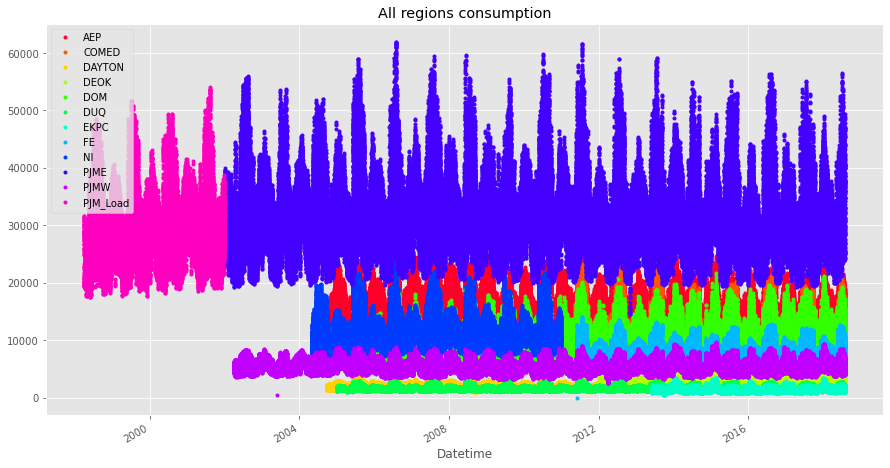

In [6]:
colors = cm.get_cmap("gist_rainbow", 12)
color_list = [colors(i) for i in range(12)]
df.plot(style='.', figsize=(15, 8), title='All regions consumption', color=color_list)

Text(0.5, 0, 'Years')

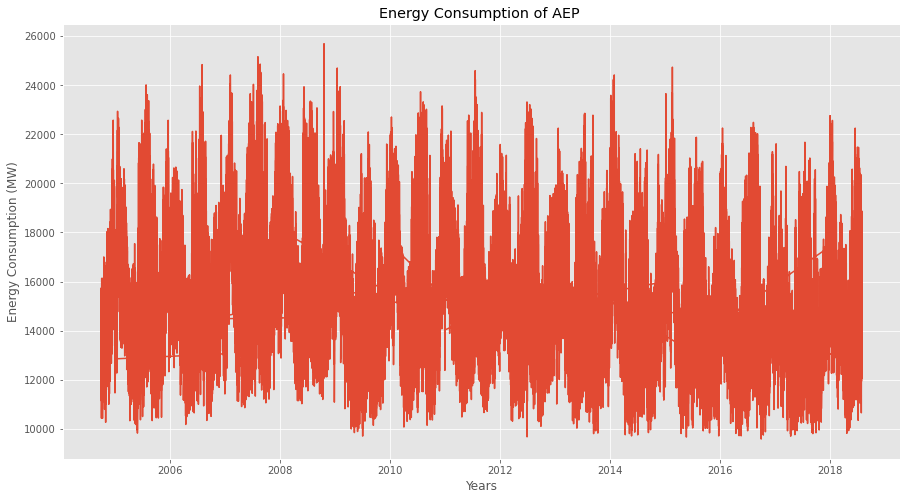

In [9]:
plt.figure(figsize=(15,8))
plt.plot(df.index, df["AEP"])
plt.title('Energy Consumption of AEP ')
plt.ylabel('Energy Consumption (MW)')
plt.xlabel('Years')

In [13]:
# Load the data
df_aep = pd.read_csv('dataset/AEP_hourly.csv', parse_dates=['Datetime'],index_col='Datetime')
print("============================")
print("Null Values  ","\n")
print(df_aep.isnull().sum(),"\n")

Null Values   

AEP_MW    0
dtype: int64 



In [38]:
df_aep['hour']=df_aep.index.hour
df_aep['dayofweek']=df_aep.index.dayofweek
df_aep['month']=df_aep.index.month
df_aep['quarter']=df_aep.index.quarter
df_aep['year']=df_aep.index.year
df_aep['dayofyear']=df_aep.index.dayofyear
df_aep['weekofyear']=df_aep.index.isocalendar().week


[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018]


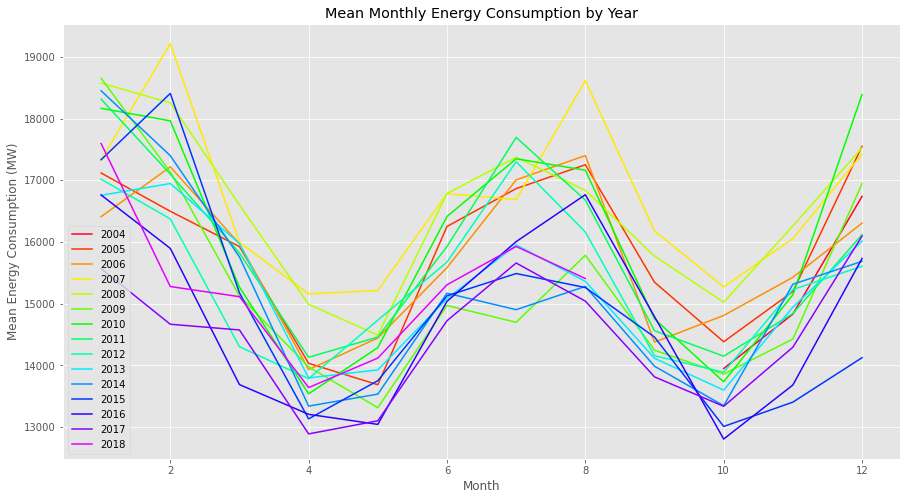

In [72]:
year_group = df_aep.groupby(['year', 'month']).mean().reset_index()
years = df_aep['year'].unique()
print(years)
NUM_COLORS = len(years)
cma = plt.get_cmap('gist_rainbow')
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cma(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for i,y in enumerate(years):
    dataset = year_group[year_group['year'] == y]
    plt.plot(dataset['month'], dataset['AEP_MW'])
plt.title('Mean Monthly Energy Consumption by Year')
plt.xlabel('Month')
plt.ylabel('Mean Energy Consumption (MW)')
plt.legend(years)
plt.show()

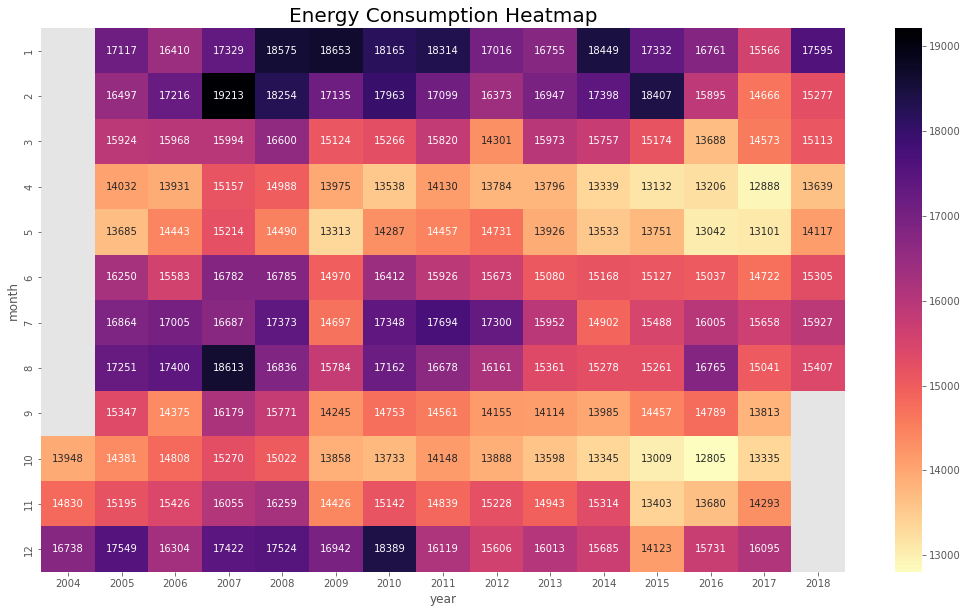

In [29]:
df_pivot = df_aep.pivot_table(index='month', columns='year', values='AEP_MW')

plt.figure(figsize=(18,10))
sns.heatmap(df_pivot, annot=True,cmap='magma_r', fmt='.0f')
plt.title('Energy Consumption Heatmap', fontsize=20)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6724\2463690226.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predection']=y_pred


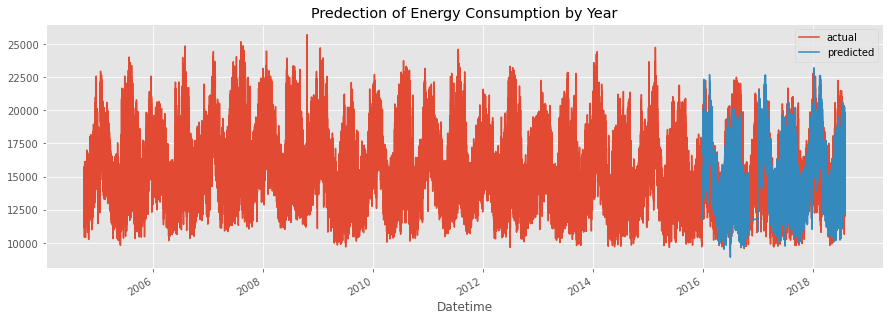

In [78]:
feature=['hour', 'dayofweek', 'month', 'quarter', 'year','dayofyear']
target='AEP_MW'
train=df_aep.iloc[:100000, :]
test=df_aep.iloc[100000:,:]
X_train=train[feature]
y_train=train[target]
X_test=test[feature]
y_test=test[target]
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
test['predection']=y_pred
fig,ax=plt.subplots(figsize=(15,5))
df_aep['AEP_MW'].plot(ax=ax,ls='solid')
test['predection'].plot(ax=ax,ls='solid')
ax.legend(['actual','predicted'])
plt.title('Predection of Energy Consumption by Year')
plt.show()

In [80]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,
y_pred)))


Root Mean Squared Error: 1968.1649690322529
